# Fine tuning : gradient descent boosting

Pour finir, nous allons nous concentrer sur la méthode **Gradient Boosting** de scikit-learn. On a vu que, 'de base' (ie. sans aucun ajustement des hyperparamètres), cette méthode fournit un score de 0.63 environ. 

Dans ce notebook, nous allons mettre en place plusieurs méthodes afin d'augmenter ce score.


<img src="http://www.psdgraphics.com/wp-content/uploads/2009/12/warning-sign.jpg" alt="NYC_map" align="left" style="width:30px;height:20px;">
ATTENTION : Dans ce notebook, nous vous conseillons de ne pas lancer les cellules, car elle mettent beaucoup de temps à se terminer (en particulier la partie random_search)

## Import et préparation du dataset

On effectue la même importation / prétraitement que dans le notebook précédent

In [1]:
%matplotlib inline

In [2]:
import pandas
import matplotlib.pyplot as plt
import importation
from sklearn import metrics
from sklearn import model_selection
from sklearn import ensemble
import numpy

In [3]:
trips = importation.chargement_donnees()
trips = importation.clean(trips)

trips['vitesse_moyenne'] = trips['trip_distance']/trips['trip_time_in_secs']
trips = trips.drop(['trip_distance', 'trip_time_in_secs', 'medallion', 'hack_license', 'vendor_id', 
            'pickup_datetime', 'dropoff_datetime', 'total_amount'], axis=1)
trips = trips[(trips['payment_type'] == 'CRD')]
trips = trips.drop(['payment_type'], axis=1)

trips = pandas.get_dummies(data=trips, columns=['nuit_jour', 'jour_semaine'])  

X = trips.drop(['tip_amount','nuit_jour_jour', 'jour_semaine_Monday'], axis=1) # on supprime juste les deux dummy variable 'trap'
y = trips['tip_amount']

On sépare notre jeu de données en 3 parties :
- 60% en données d'apprentissage
- 20% en données de cross-validation pour ajuster les hyperparamètres
- 20% en données de test pour mesurer la performance du modèle final

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
print(X_train.shape)
print(X_test.shape)

(369876, 12)
(92469, 12)


## Random search

Voici les hyperparamètres de la méthode GradientBoostingRegressor() :
- max_depth
- n_estimators 
- min_samples_split
- min_samples_leaf

La documentation en fournit d'autres mais on ne s'y intéressera pas ici car cela rallongerait considérablement la recherche de la meilleure combinaison d'hyperparamètres.

La méthode RandomSearch va nous permettre de tester plusieurs combinaisons des hyperparamètres.

In [17]:
gboost = ensemble.GradientBoostingRegressor()

In [18]:
from scipy.stats import randint as sp_randint

# specify parameters and distributions to sample from
param_dist = {"max_depth": sp_randint(1, 7),
              "n_estimators": sp_randint(1, 300),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11)
              }

# run randomized search
n_iter_search = 20
random_search = model_selection.RandomizedSearchCV(estimator=gboost, param_distributions=param_dist,
                                   n_iter=n_iter_search, n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000255AE24D588>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002559E4A5390>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002559E4A5198>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002559E4A5518>},
          pre_dispatch='2*n_jobs', ran

On affiche le résultat sous forme de DataFrame pandas :

In [19]:
pandas.DataFrame(random_search.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,72.347119,0.637948,0.626696,0.633221,2,2,5,276,"{'min_samples_split': 5, 'max_depth': 2, 'n_es...",6,0.631418,0.630969,0.618928,0.637070,0.629743,0.631624,0.949521,0.028026,0.005535,0.002735
1,211.985382,0.917412,0.623513,0.661012,5,2,8,262,"{'max_depth': 5, 'min_samples_split': 8, 'n_es...",14,0.629839,0.659840,0.614436,0.665090,0.626264,0.658107,1.688889,0.027988,0.006582,0.002969
2,35.916069,0.229154,0.627767,0.632907,4,10,9,53,"{'max_depth': 4, 'min_samples_split': 9, 'n_es...",1,0.632749,0.630812,0.619991,0.636629,0.630561,0.631281,0.392044,0.002161,0.005570,0.002639
3,141.259748,0.719149,0.626761,0.649705,5,6,5,167,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...",4,0.631821,0.648072,0.618505,0.653429,0.629958,0.647614,1.028932,0.001250,0.005887,0.002640
4,29.654686,0.454972,0.625570,0.626814,1,10,3,216,"{'max_depth': 1, 'min_samples_split': 3, 'n_es...",8,0.630718,0.624397,0.617329,0.631041,0.628664,0.625005,0.373402,0.039432,0.005888,0.002999
5,30.068752,0.296533,0.626731,0.629206,2,7,3,106,"{'max_depth': 2, 'min_samples_split': 3, 'n_es...",5,0.631578,0.626937,0.618637,0.633238,0.629976,0.627442,0.084680,0.014850,0.005760,0.002859
6,27.129471,0.138093,0.599076,0.608005,6,1,10,15,"{'max_depth': 6, 'min_samples_split': 10, 'n_e...",18,0.606737,0.605681,0.590243,0.611786,0.600246,0.606547,0.067298,0.006485,0.006785,0.002697
7,270.825587,1.086728,0.621767,0.670432,6,3,6,245,"{'max_depth': 6, 'min_samples_split': 6, 'n_es...",17,0.627504,0.669192,0.612444,0.674759,0.625355,0.667345,3.781425,0.046600,0.006651,0.003151
8,3.254176,0.074386,0.504204,0.504475,2,2,6,9,"{'min_samples_split': 6, 'max_depth': 2, 'n_es...",19,0.510391,0.502205,0.496552,0.507829,0.505670,0.503392,0.155193,0.004500,0.005744,0.002420
9,143.635395,0.811307,0.626884,0.646013,4,7,5,251,"{'min_samples_split': 5, 'max_depth': 4, 'n_es...",3,0.631769,0.643873,0.619089,0.649835,0.629793,0.644331,3.761053,0.042858,0.005570,0.002709


On enregistre les résultats dans un fichier csv à part (car le temps de calcul pour obtenir la table précédente est de l'ordre de 30 minutes)

In [20]:
pandas.DataFrame(random_search.cv_results_).to_csv('random_search.csv')

## Learning curves, importance des variables et performance du modèle

Etudions les caractéristiques du meilleur modèle exploré. Nous allons :
- Afficher la learning curve pour vérifier qu'il n'y a pas eu de sur/sous-apprentissage
- Afficher l'importance des variables explicatives
- Afficher les performances du modèle sur les données de test (séparées au début de ce notebook, et qui n'ont donc pas influencé le choix des hyperparamètres)

### Learning curves
Commençons avec la learning curve. Comme dans le noteboook précédent, on utilise la fonction 'plot_learning_curve' récupérée ici : http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [25]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=numpy.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = model_selection.learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = numpy.mean(train_scores, axis=1)
    train_scores_std = numpy.std(train_scores, axis=1)
    test_scores_mean = numpy.mean(test_scores, axis=1)
    test_scores_std = numpy.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    return plt

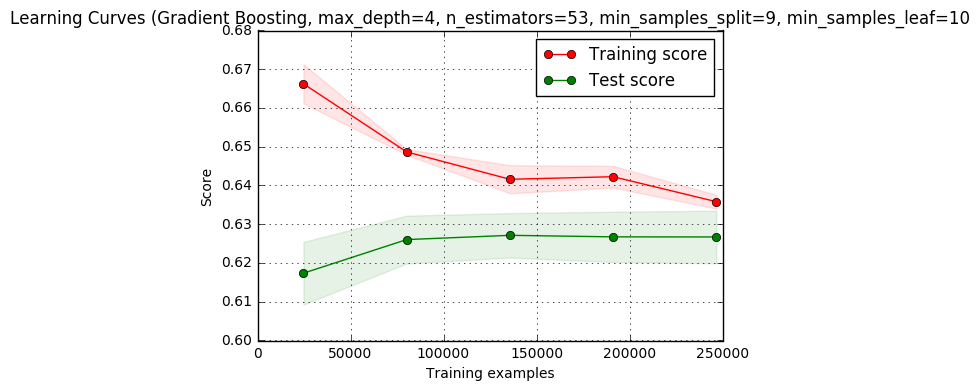

In [27]:
title = str(
'Learning Curves (Gradient Boosting, max_depth=' + str(random_search.best_estimator_.max_depth) +
', n_estimators=' + str(random_search.best_estimator_.n_estimators) +
', min_samples_split=' + str(random_search.best_estimator_.min_samples_split) +
', min_samples_leaf=' + str(random_search.best_estimator_.min_samples_leaf) + ')'
    )

gboost_final = ensemble.GradientBoostingRegressor(max_depth=random_search.best_estimator_.max_depth,
                                                  n_estimators=random_search.best_estimator_.n_estimators)
plot_learning_curve(gboost_final, title, X_train, y_train)
plt.show()

La learning curve a une 'bonne' forme : les deux scores se rapprochent et finissent par être proches. Ainsi, on sait que le modèle a atteint son maximum de capacité d'apprentissage. On est bien hors des situations de sous-apprentissage et de sur-apprentissage

In [28]:
gboost_final.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=53, presort='auto',
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

### Importance des variables
On affiche ensuite l'importance des variables (issue de http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html)

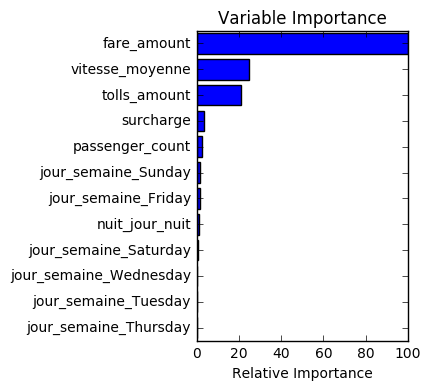

In [29]:
feature_importance = gboost_final.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = numpy.argsort(feature_importance)
pos = numpy.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

La variable qu'on a ajouté lors du notebook 3 se place en deuxième position. C'était donc un choix judicieux.

Observons les distributions des valeurs prédites vs les valeurs réelles :

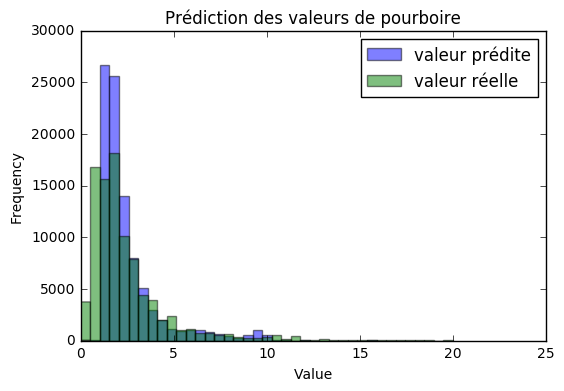

In [39]:
bins = numpy.linspace(0, 20, 40)

plt.hist(gboost_final.predict(X_test), bins, alpha=0.5, label='valeur prédite')
plt.hist(y_test, bins, alpha=0.5, label='valeur réelle')
plt.legend(loc='upper right')
plt.title("Prédiction des valeurs de pourboire")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

On remarque que l'algorithme ne parvient pas a ajuster les petites valeurs de pourboire. On avait déjà remarqué ce phénomène avec le modèle linéaire. On peut suppose que le comportement des petites valeurs de pourboires (< 1$) est beaucoup moins prévisible que les valeurs plus grandes.

### Performance du modèle
Pour terminer, on va mesurer la qualité de l'algorithme choisi sur les données de test initiales :

In [30]:
gboost_final.score(X_test,y_test)

0.6319429632685567

Ce score est en accord avec les évaluations précédentes sur les sets de cross-validation. Pour finir, affichons l'erreur moyenne commise :

In [37]:
from math import sqrt
sqrt(metrics.mean_squared_error(y_test, gboost_final.predict(X_test)))

1.2965803085535073

En moyenne, on a une erreur de 1,30$

Note : Certains articles montrent qu'il est plus efficace (beaucoup plus rapide et légère perte de performance) de faire un random search plutôt qu'un grid search. C'est pourquoi c'est la méthode qu'on a utilisé ici. (http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf)

Pour information, le random search dans ce notebook a tourné environ 40 min sur un intel i5-2500k quad-core.